# Submetric: Public Assistance Income in Pittsburgh.

By Aihzel Cipriano

Public Assistance Income describes the money a person or family recieves from the government to help meet basic living needs such as food or housing, and they recieve this money due to low income. The numbers in the following dataset describe each Pittsburgh Neighborhood's total Public Assistance Income for the year of 2014. 

https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/38a5632d-1355-492c-8735-51bf68bdff13

For my sub-metric, I focused on the percentage of households receiving public assistance income. I chose this measure because it provides insight into the economic stability of each neighborhood in Pittsburgh. Neighborhoods with fewer households depending on public assistance tend to have higher average incomes, more employment opportunities, and potentially better access to resources.
My initial idea was to measure median household income as a direct indicator of wealth, but I decided that public assistance rates offer a more human and community-focused view of financial well-being. 
By analyzing this dataset, I aimed to understand which neighborhoods have the lowest percentage of households relying on assistance — under the assumption that fewer households receiving assistance correlates with higher neighborhood economic health.

The above dataset reports the number of households in each Pittsburgh neighborhood that received public assistance income, such as TANF or General Assistance, over the past 12 months. It also includes the total number of households per neighborhood.
To create my metric, I calculated the percentage of households receiving public assistance in each neighborhood:

Percent on Public Assistance = (Households on Assistance/ Total Households) x 100

Then, to make the metric comparable with others in our group, I normalized it to a 0–1 “score”, where a lower score means a “better” neighborhood (less reliance on public assistance).

Normalized Value = (x - xmin)/(xmax-xmin)




# So What's the Best Neighborhood?

After computing the percentage of households on public assistance for each neighborhood, I ranked them from lowest to highest. Neighborhoods with the lowest percentages are considered the “best” under this sub-metric because they have fewer households depending on government income assistance.
When visualized on a map, a clear pattern appears, wealthier neighborhoods such as Squirrel Hill North, Squirrel Hill South, and Shadyside have the lowest levels of public assistance participation, while neighborhoods like Homewood North, Homewood South, and Hazelwood show much higher percentages.
Based on this metric, the best neighborhood in Pittsburgh is Chartiers City, which had the smallest proportion of households receiving public assistance.
Chartiers City is also home to a large number of professionals, has high property values, and strong community resources. The visualization below ranks all neighborhoods by their percentage of households receiving assistance.


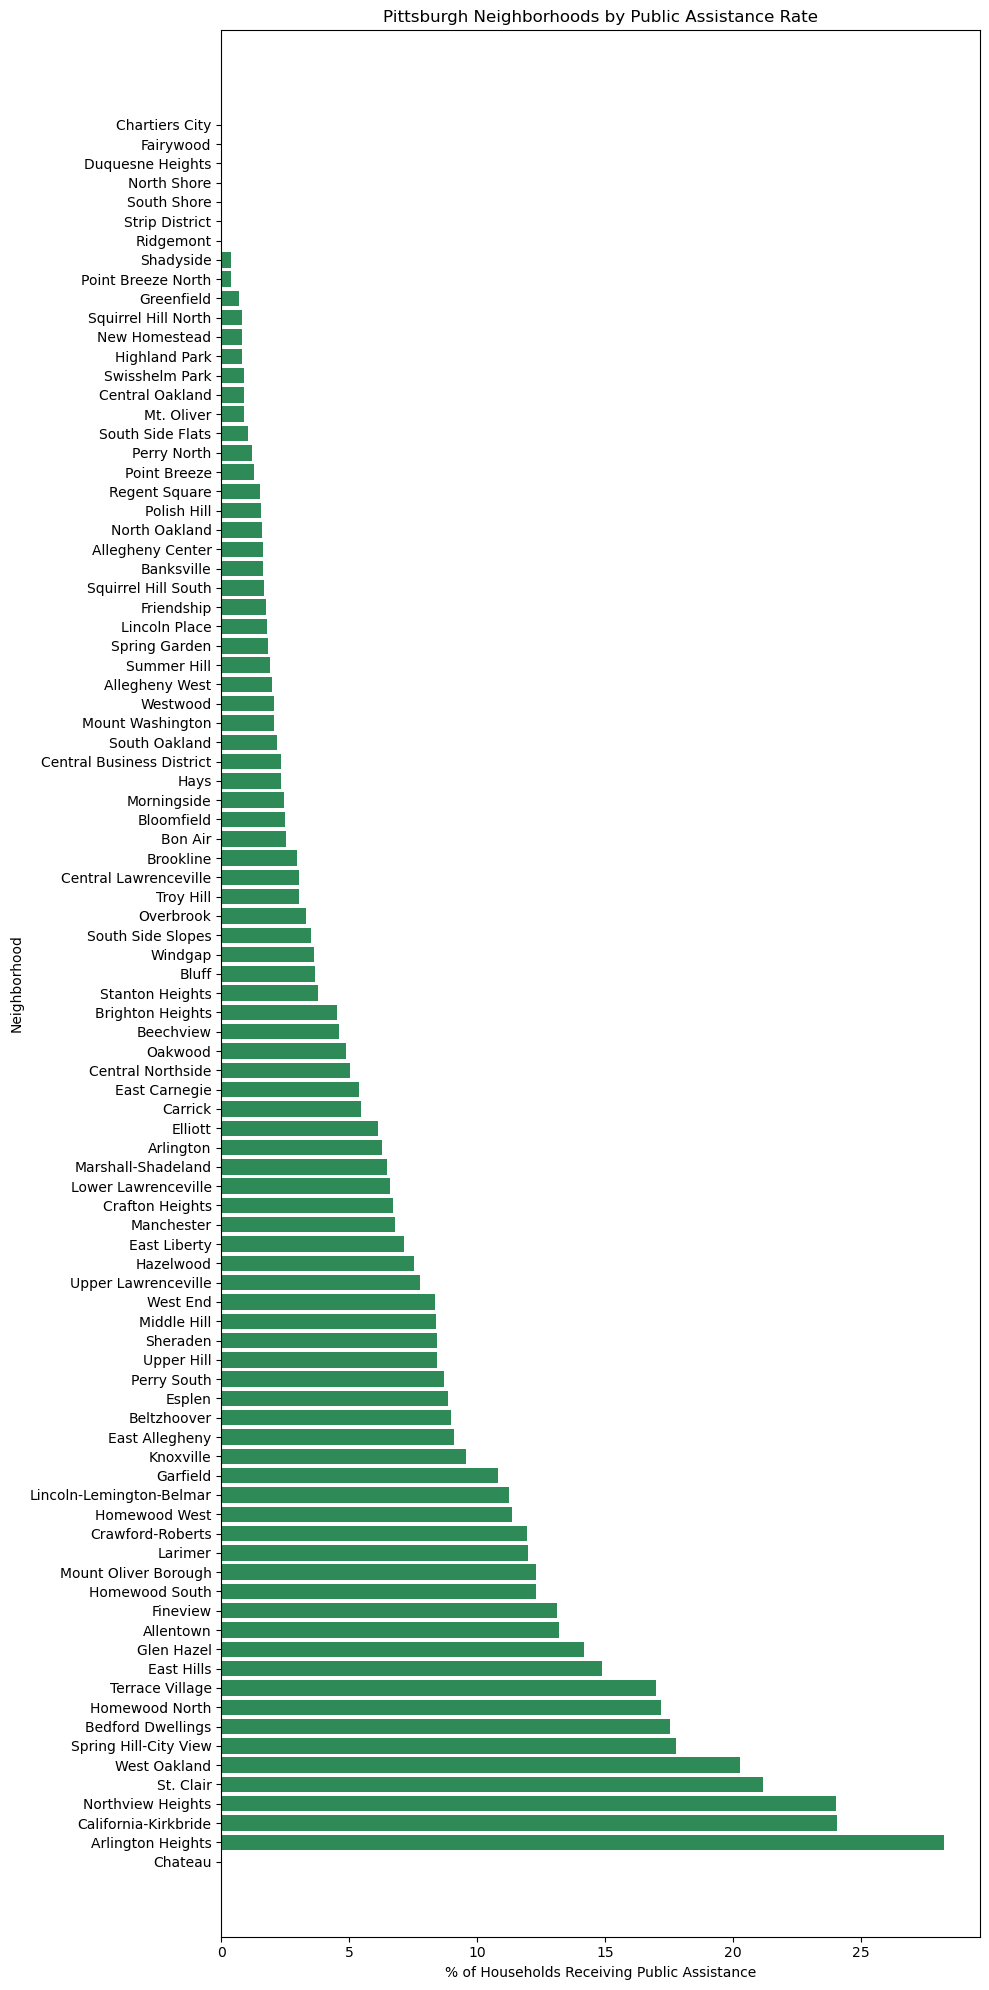

Best Neighborhood (Public Assistance metric): Chartiers City
→ 0.00% of households receive public assistance


In [1]:

# import pandas for data manipulation, matplotlib for data visualization
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# load dataset from WPRDC URL
acs_url = "https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/38a5632d-1355-492c-8735-51bf68bdff13/download/public-assistance-income-in-the-past-12-months-for-households.csv"
acs = pd.read_csv(acs_url)

# keeps only relevant columns
acs.columns = acs.columns.str.strip()

# renaming columns for easier reference
acs = acs[['Neighborhood', 
           'Estimate; Total:', 
           'Estimate; Total: - With public assistance income']]

acs = acs.rename(columns={
    'Neighborhood': 'neighborhood',
    'Estimate; Total:': 'total_households_est',
    'Estimate; Total: - With public assistance income': 'public_assist_est'
})

# remove rows with missing data
acs = acs.dropna(subset=['public_assist_est', 'total_households_est'])

# calculate % of households on public assistance
acs['pct_public_assist'] = (acs['public_assist_est'] / acs['total_households_est']) * 100

# normalize to 0–1 score
vals = acs['pct_public_assist']
acs['pa_score'] = 1 - ((vals - vals.min()) / (vals.max() - vals.min()))

# sort neighborhoods by % public assistance
ranked = acs.sort_values('pct_public_assist')

# plot all neighborhoods
plt.figure(figsize=(10, 20))  # taller figure to fit all names
plt.barh(ranked['neighborhood'], ranked['pct_public_assist'], color='seagreen')
plt.gca().invert_yaxis()
plt.xlabel("% of Households Receiving Public Assistance")
plt.ylabel("Neighborhood")
plt.title("Pittsburgh Neighborhoods by Public Assistance Rate")
plt.tight_layout()
plt.show()

# print best (lowest assistance) neighborhood
best = ranked.iloc[0]
print(f"Best Neighborhood (Public Assistance metric): {best['neighborhood']}")
print(f"→ {best['pct_public_assist']:.2f}% of households receive public assistance")



# Conclusion

While the metric identifies Charter’s City as the “best” in terms of public assistance rates, my personal favorite neighborhood is Squirrel Hill North. Including it in the visualization highlights the difference between a data-driven ranking and personal preference, which is an important aspect of interpreting this project’s results. This difference proves how “best” depends heavily on how you define it. My metric captures economic stability, but it doesn’t account for factors like community culture, diversity, or affordability. In other words, data gives a valuable but limited lens: it tells us where people may be financially secure, but not necessarily why those neighborhoods are great places to live.

